In [ ]:
"""
  Author : Mann Desai
  Topic : KMeans Clustering
  Lab : 06
"""

# KMeans Clustering :
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score



In [ ]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.2, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state = 0, n_init="auto").fit(X)

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.95164831  4.28882085]
 [ 2.0720792   0.98848385]
 [-1.538563    2.91165191]]


In [ ]:
labels = kmeans.labels_

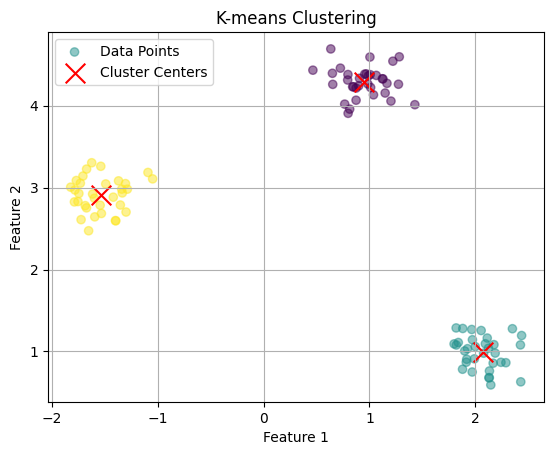

In [ ]:
# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Data Points')

# Plotting the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8816040239688525


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


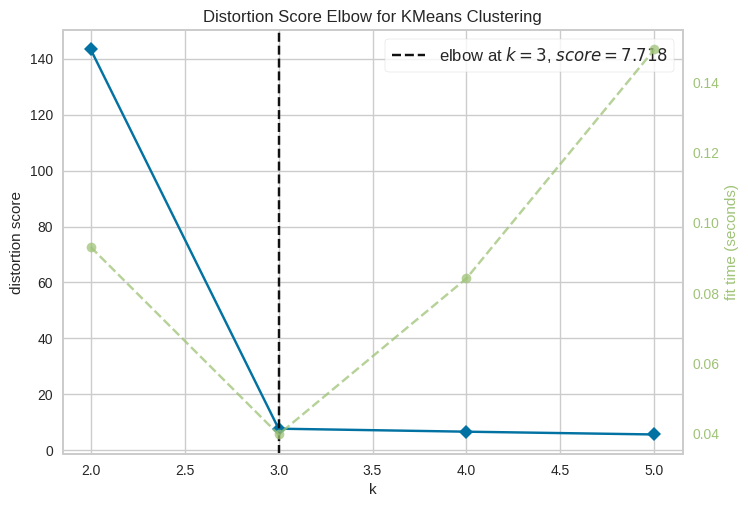

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 6), metric='distortion')

# Fit the data and visualize
visualizer.fit(X)
visualizer.show()

In [1]:
# PART-B
# Hand Written Digit Recognition

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix


In [10]:
digits = load_digits() #load the dataset in digits
data = digits.data
data.shape

(1797, 64)

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data[0:3]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
from sklearn.cluster import KMeans
_ = [0,1,2,3,4,5,6,7,8,9]
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X=digits.data , y=_);

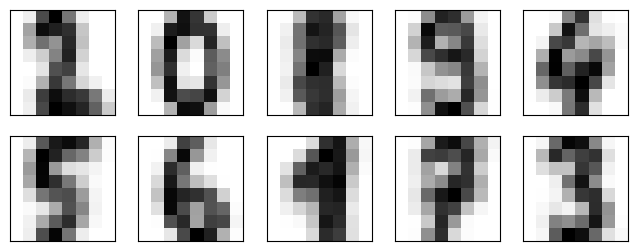

In [17]:
fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &plotting relevant centers
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

In [18]:
clusters = kmeans.labels_
labels = np.zeros_like(clusters) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False False False]
[ True False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False  True  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


In [19]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(digits.data,kmeans.labels_)
silhouette_avg

0.18205431959440666

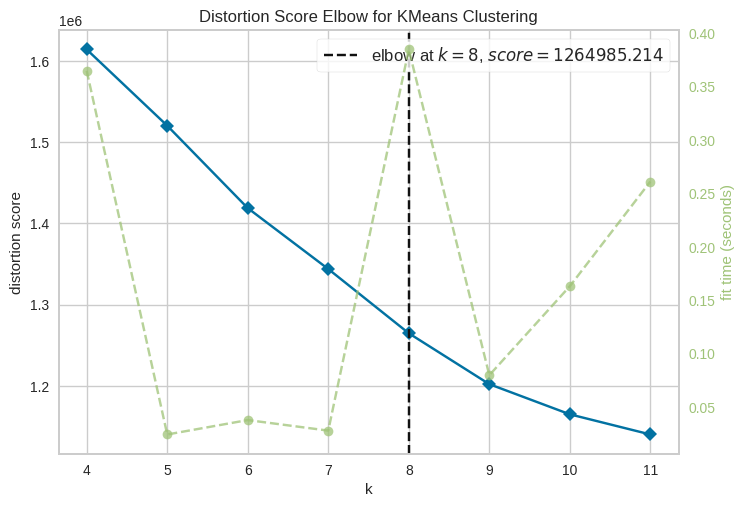

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

visualizer = KElbowVisualizer(kmeans, k=(4,12))

visualizer.fit(digits.data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data